In [1]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import trading as trd

In [3]:
# relaod module after modifying it
import importlib
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [4]:
STOCK_DATA_LOC = join('..', 'data')
stock_files = glob.glob(join(STOCK_DATA_LOC, '*.csv'))
p = np.random.permutation(range(len(stock_files)))

In [5]:
def cust_plt(ax, data, label='', **kwargs):
    ax.plot_date(data.index, data, ls='solid', marker='', label=label, **kwargs)

In [6]:
stock_a_name = splitext(basename(stock_files[1]))[0]
stock_a = trd.read_stock_history(stock_files[1])
stock_b_name = splitext(basename(stock_files[2]))[0]
stock_b = trd.read_stock_history(stock_files[2])

do_nothing = trd.do_nothing_benchmark(stock_a, stock_b)
rebal_80 = trd.rebalance_benchmark(stock_a, stock_b)

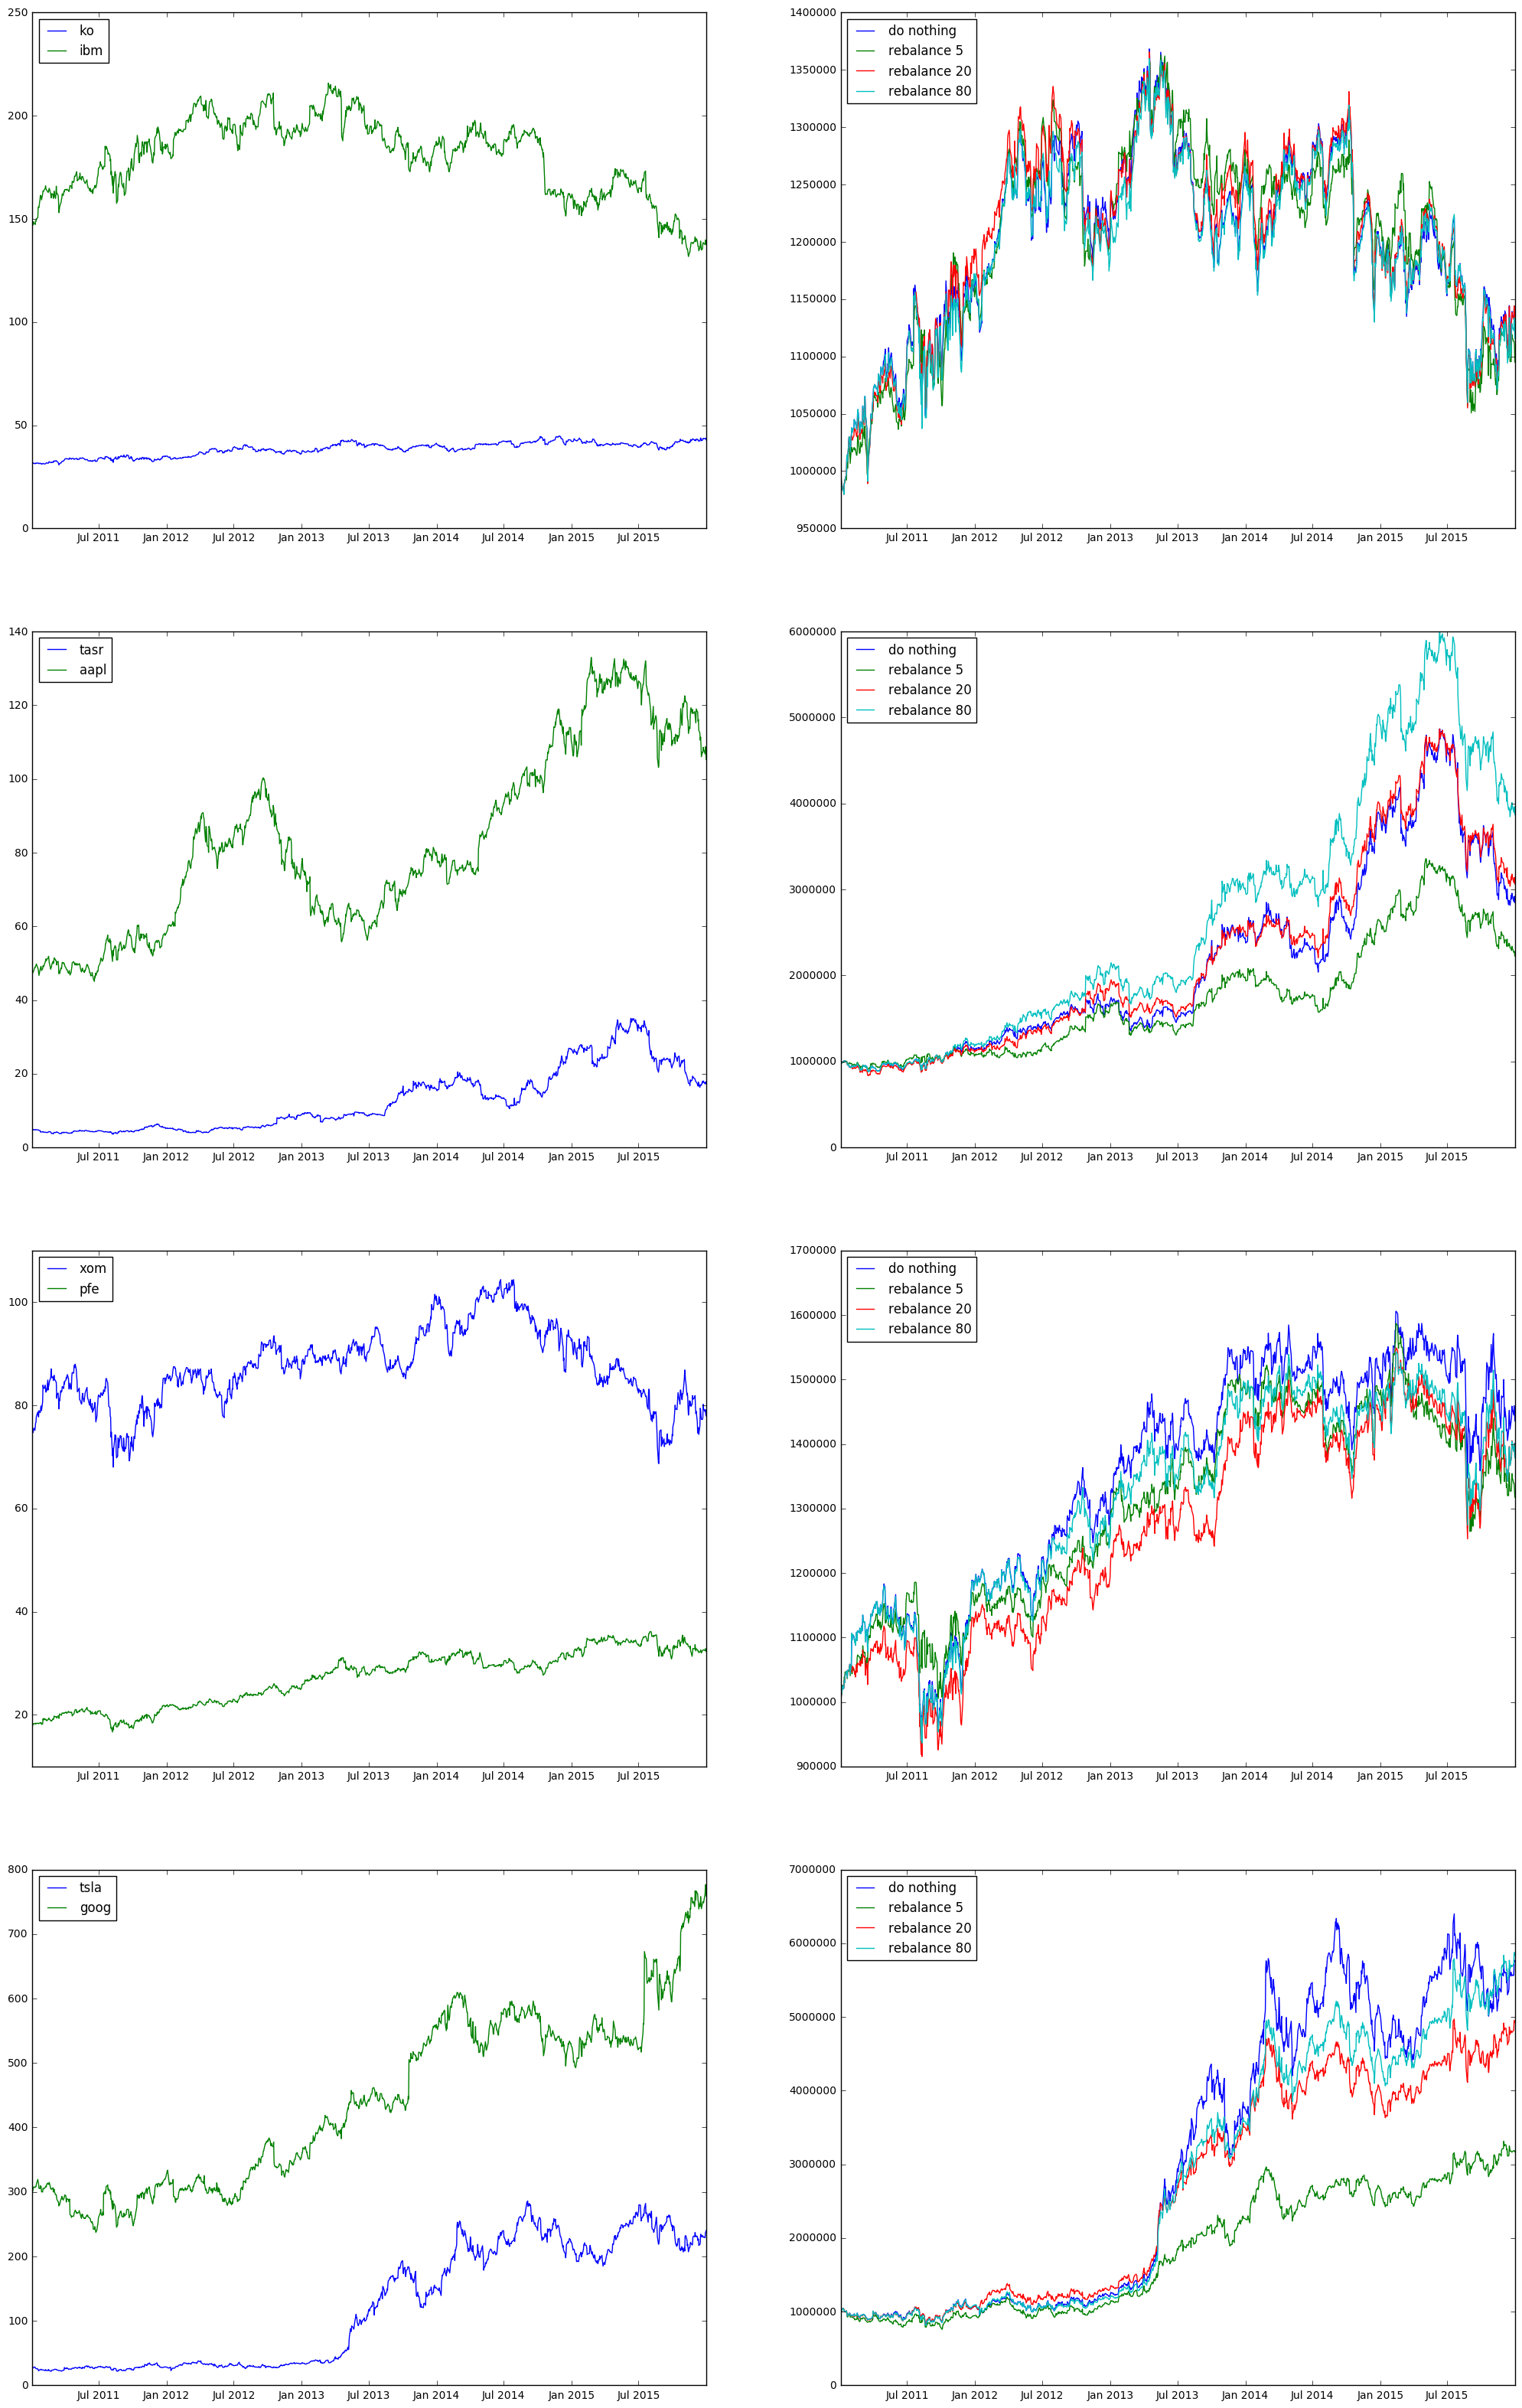

In [12]:
n = len(p) // 2
f = plt.figure(figsize=(25, 40))
for i in range(n):
    stock_a_name = splitext(basename(stock_files[p[i * 2]]))[0]
    stock_a = trd.read_stock_history(stock_files[p[i * 2]])
    stock_b_name = splitext(basename(stock_files[p[i * 2 + 1]]))[0]
    stock_b = trd.read_stock_history(stock_files[p[i * 2 + 1]])
    
    do_nothing = trd.do_nothing_benchmark(stock_a, stock_b)
    rebal_5 = trd.rebalance_benchmark(stock_a, stock_b, rebalance_period=5)
    rebal_20 = trd.rebalance_benchmark(stock_a, stock_b, rebalance_period=20)
    rebal_80 = trd.rebalance_benchmark(stock_a, stock_b, rebalance_period=80)
    
    ax = plt.subplot(n, 2, 2*i + 1)
    cust_plt(ax, stock_a, stock_a_name)
    cust_plt(ax, stock_b, stock_b_name)
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
    ax = plt.subplot(n, 2, 2*i + 2 )
    cust_plt(ax, do_nothing.total, 'do nothing')
    cust_plt(ax, rebal_5.total, 'rebalance 5')
    cust_plt(ax, rebal_20.total, 'rebalance 20')
    cust_plt(ax, rebal_80.total, 'rebalance 80')
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    